# Lab 4 : Bayesian Decision Surfaces
# Solution

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Part 1

In [2]:
data = pd.read_csv('binclass.txt')
data.head(2)

,4.5316,13.561,1
0,8.1112,13.9300,1
1,15.5630,4.8348,1


In [3]:
data.columns = ["x1", "x2", "y"]
x = data[['x1', 'x2']]
x = StandardScaler().fit_transform(x)
y = data['y']
mod = GaussianNB()
mod.fit(x,y)
yhat=mod.predict(x)
print('Accuracy Score: ', mod.score(x, y))
print("Number of mislabeled points out of a total %d points : %d" % (x.shape[0],(y != yhat).sum()))

Accuracy Score:  0.9523809523809523
Number of mislabeled points out of a total 399 points : 19


<AxesSubplot: xlabel='x1', ylabel='x2'>

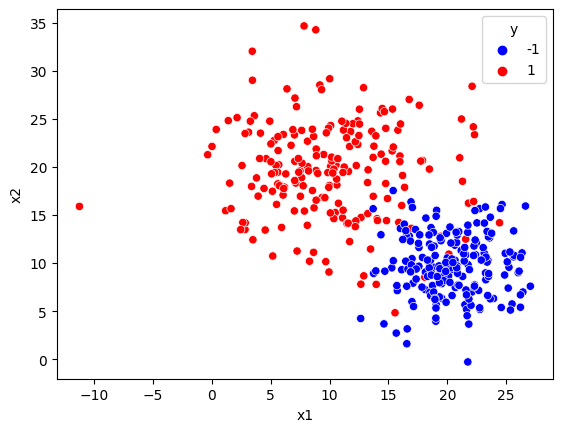

In [4]:
sns.scatterplot(x="x1", y="x2",palette=['blue','red'] , hue='y', data=data)

In [5]:
from matplotlib.colors import ListedColormap
X_set, y_set = x, y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.1))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


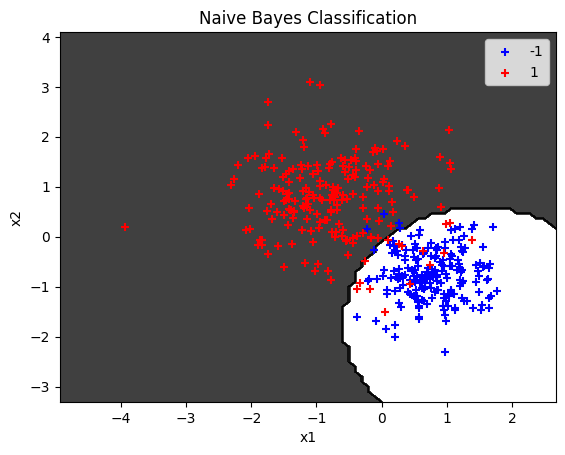

In [6]:
plt.contourf(X1, X2, mod.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('white', 'black')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(( 'blue','red'))(i), label = j,marker='+')
plt.title('Naive Bayes Classification')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

# Report
We can see that the positive class dominates most of the feature space thus the decision boundary is in the corner near to the small area where the negative class found.
Also we can see that the accuracy of this classifier with equal prior probabilities approaches 95.238%

# Part 2

In [7]:
data = pd.read_csv('binclassv2.txt')
data.head(2)

,20,-30,1
0,30.0,-30.0,1
1,40.0,-30.0,1


In [8]:
data.columns = ["x1", "x2", "y"]
x = data[['x1', 'x2']]
x = StandardScaler().fit_transform(x)
y = data['y']
mod=GaussianNB()
mod.fit(x,y)
yhat=mod.predict(x)
print('Accuracy Score: ', mod.score(x, y))
print("Number of mislabeled points out of a total %d points : %d" % (x.shape[0],(y != yhat).sum()))

Accuracy Score:  0.9573934837092731
Number of mislabeled points out of a total 399 points : 17


<AxesSubplot: xlabel='x1', ylabel='x2'>

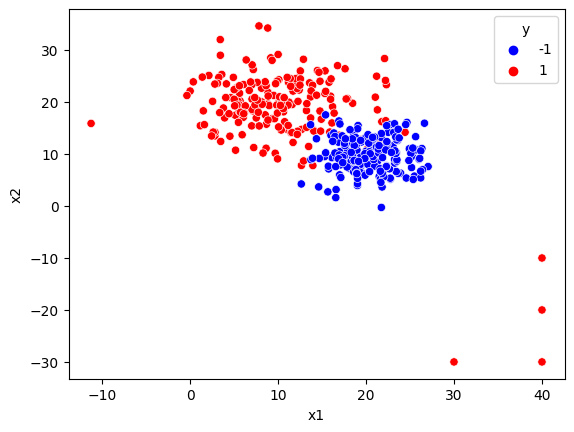

In [9]:
sns.scatterplot(x="x1", y="x2",palette=['blue','red'] , hue='y', data=data)


In [10]:
from matplotlib.colors import ListedColormap
X_set, y_set = x, y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.1))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


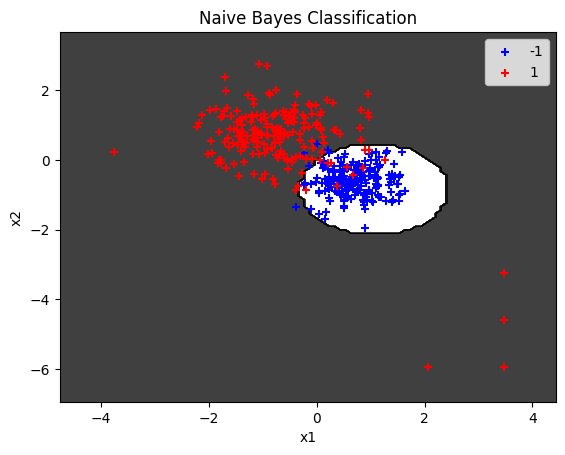

In [11]:
plt.contourf(X1, X2, mod.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('white', 'black')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(( 'blue','red'))(i), label = j,marker='+')
plt.title('Naive Bayes Classification')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

# Report 
We can see from the distribution that the discision boundary between the 2 classes is not very obvious.